In [1]:
import numpy as np

In [2]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]

In [3]:
len(x_vec)

100

In [4]:
y_vec = np.random.randn(len(x_vec))

In [5]:
y_vec

array([ 2.85498571,  0.3205534 ,  1.57475238, -0.18866235,  0.02956673,
        0.8494886 , -1.42602791,  2.01697265, -0.35574438,  1.99199429,
        0.32350316,  0.52315721, -0.38973764, -1.03463059, -0.13884478,
       -0.86387862, -1.1852771 , -0.08475538,  0.80157   , -0.50285168,
       -0.35907567,  1.41741977, -0.42558087, -1.11739754, -0.39714651,
        0.21601773, -1.46253429, -1.87520158, -0.49872048, -2.20322813,
        1.30216995, -1.36408388, -0.64975391,  1.86297571,  0.30611341,
        0.29889838, -0.74846705,  1.10194252, -1.07219162,  1.20003342,
       -0.54659549, -0.44081239, -0.50408312,  0.21389248,  1.02314169,
       -1.0323003 , -0.80302218, -0.25101949,  0.14949606, -2.93853216,
       -0.20505877, -1.51303018,  0.70160453,  0.45724613, -1.31368532,
       -0.64881785, -1.4645585 , -0.03990881, -0.17269069, -0.77347166,
       -0.14715174,  0.8458762 ,  0.66993316,  0.89356325, -1.34879045,
       -1.68464832,  1.90692569,  0.88406248,  0.22070249, -2.66

In [6]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]
y_vec = np.random.randn(len(x_vec))
line1 = []
for idx in range(10):
    rand_val = np.random.randn(1)
    y_vec[-1] = rand_val
    y_vec = np.append(y_vec[1:],0.0)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

class LivePlotNotebook(object):
    """
    Live plot using %matplotlib notebook in jupyter notebook
    
    Usage:
    ```
    import time
    liveplot = LivePlotNotebook()
    x=np.random.random((10,))
    for i in range(10):
        time.sleep(1)
        liveplot.update(
            x=x+np.random.random(x.shape)/10,
            actions=np.random.randint(0, 3, size=(10,))
        )
    ```
    
    url:
    """

    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1)
        
        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')
        
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')
        
        self.ax = ax
        self.fig = fig

    def update(self, x, actions):             
        # update price
        line = self.ax.lines[0]
        line.set_xdata(range(len(x)))
        line.set_ydata(x)
        
        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
        self.ax.set_xlim(0, len(actions))
        self.ax.set_ylim(x.min(), x.max())

        self.fig.canvas.draw()
        

<IPython.core.display.Javascript object>


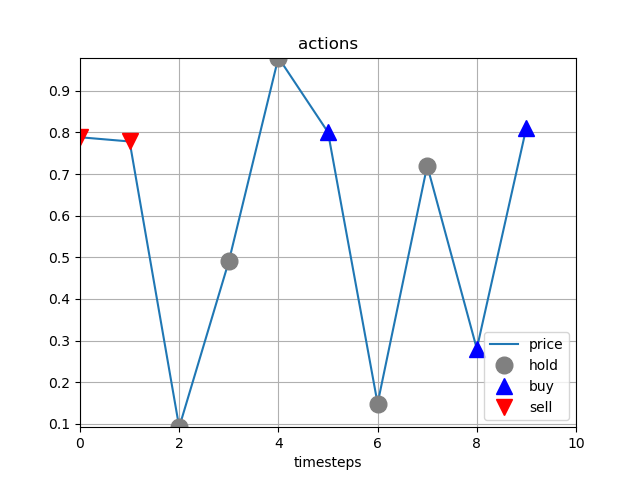

In [8]:
# Test
import time
liveplot = LivePlotNotebook()
x=np.random.random((10,))
for i in range(10):
    time.sleep(1)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,)))